# Metric v1
Create a simple "score" to assign our known binaries, just based on the Color-Mag Diagram

Maybe get "fancy" and include orbital period

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# for the TESS Science Online 48hr sprint, we'll be using Cyberpunk for the graphics!
# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
# smooth both EBs and Stars w/ a 2D Gaussian KDE
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xmin=-1, xmax = 5.5, ymin= -6, ymax=16,
          xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)
    https://stackoverflow.com/a/41639690"""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[xmin:xmax:xbins, 
                      ymin:ymax:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [4]:
numerator = pd.read_csv('BigCat.csv')

denominator = pd.read_csv('gaia_tess2min.csv')

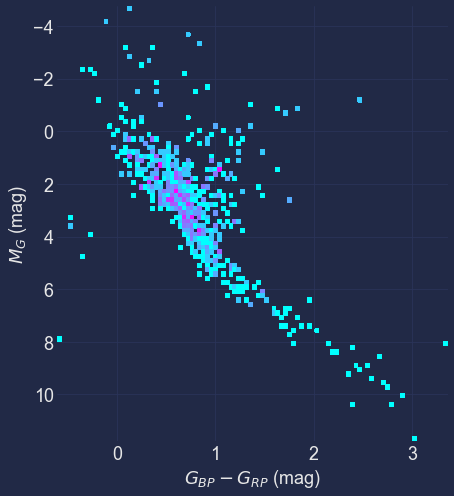

In [5]:
# EHow = pd.read_csv('EHow.csv')
EHow = pd.read_csv('Erin_and_Known_EBs.csv')
Eok = ((EHow['parallax'] > 0) & 
       np.isfinite(EHow['bp_rp']) & 
       np.isfinite(EHow['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)


In [6]:
# # lets plot the EBs in CMD space
# Nok = ((numerator['parallax'] > 0) & 
#        np.isfinite(numerator['bp_rp']) & 
#        np.isfinite(numerator['phot_g_mean_mag']))

# plt.figure(figsize=(7,8))
# plt.hist2d(numerator['bp_rp'][Nok], 
#             numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
#            norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
# plt.gca().invert_yaxis()

# plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
# plt.ylabel('$M_G$ (mag)')
# plt.grid(True)
# mplcyberpunk.add_glow_effects()

In [7]:
# ==> i'm concerned about ASAS-SN... it's over-populated w/ stuff in a big clump!

11910


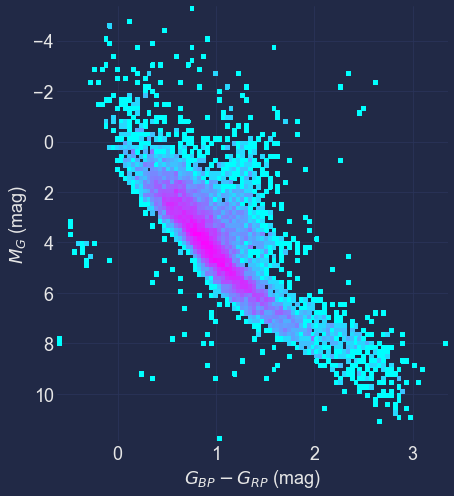

In [8]:
# adjust the cut to drop ASAS-SN for now
Nok = ((numerator['parallax'] > 0) & 
       (1000./numerator['parallax']< 40000) &
       np.isfinite(numerator['bp_rp']) & 
       np.isfinite(numerator['phot_g_mean_mag']) & 
       (np.arange(len(numerator)) < 12520)
      ) # all the EBs except ASAS-SN

print(sum(Nok))

plt.figure(figsize=(7,8))
plt.hist2d(numerator['bp_rp'][Nok], 
            numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
mplcyberpunk.add_glow_effects()

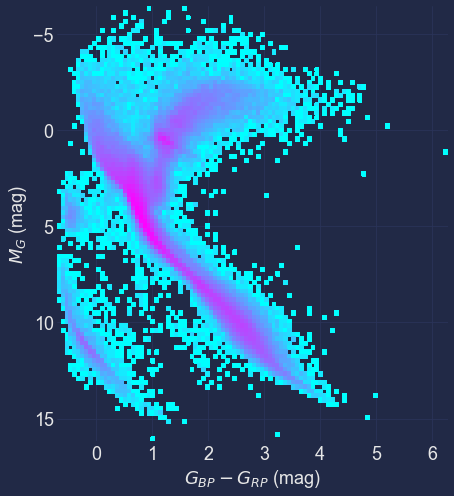

In [9]:
# lets plot all the TESS stars in CMD space

Dok = ((denominator['parallax'] > 0) & 
       np.isfinite(denominator['bp_rp']) & 
       np.isfinite(denominator['phot_g_mean_mag']))

plt.figure(figsize=(7,8))
plt.hist2d(denominator['bp_rp'][Dok], 
           denominator['phot_g_mean_mag'][Dok] - 5. * np.log10(1000./denominator['parallax'][Dok]) + 5,
           norm=LogNorm(), cmap=plt.cm.cool, bins=100)
 
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
mplcyberpunk.add_glow_effects()

In [10]:
# xx1, yy1, zz1 = kde2D(numerator['bp_rp'][Nok], 
#                       numerator['phot_g_mean_mag'][Nok] - 5. * np.log10(1000./numerator['parallax'][Nok]) + 5, 
#                       0.2)

xx1, yy1, zz1 = kde2D(EHow['bp_rp'][Eok], 
                      EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5, 
                      0.1)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


Text(0.5, 1.0, 'TESS 2-min EBs')

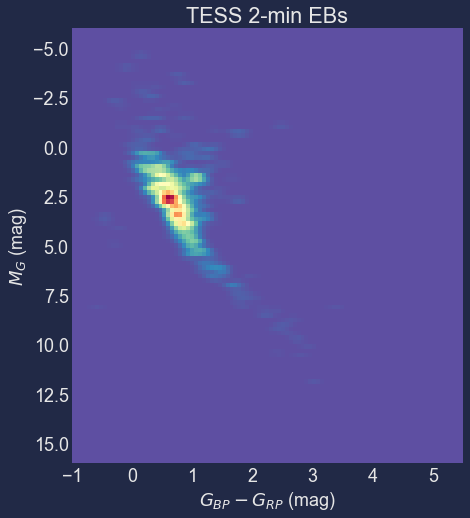

In [11]:
plt.figure(figsize=(7,8))
plt.pcolormesh(xx1, yy1, zz1, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
plt.title('TESS 2-min EBs')

In [12]:
xx2, yy2, zz2 = kde2D(denominator['bp_rp'][Dok], 
                      denominator['phot_g_mean_mag'][Dok] - 5. * np.log10(1000./denominator['parallax'][Dok]) + 5, 
                      0.1)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


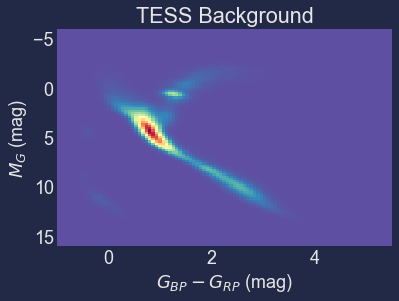

In [13]:
plt.pcolormesh(xx2, yy2, zz2, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()
plt.title('TESS Background')
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


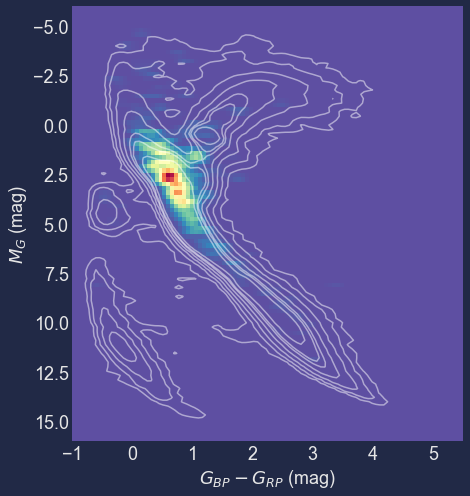

In [14]:
plt.figure(figsize=(7,8))

plt.pcolormesh(xx2, yy2, zz1, cmap=plt.cm.Spectral_r)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
plt.contour(xx2, yy2, zz2/np.sum(zz2)*np.float(len(Dok)), 
            colors='white', levels=(1,3,10,30,70,100,200), alpha=0.5)

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


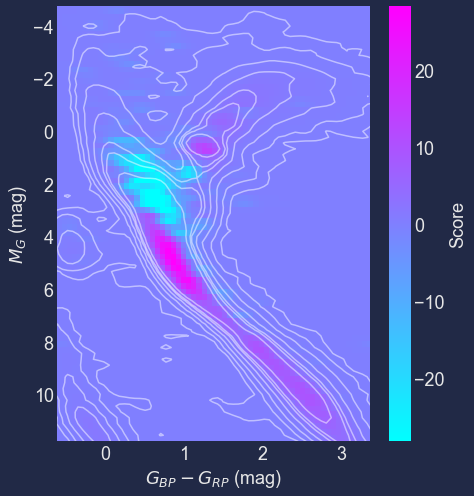

In [27]:
SCORE = (1-(zz1+1)/(zz2+1))*100
# SCORE = (np.log10(zz1/np.sum(zz1)*np.float(len(Dok))+1e-9) - 
#          np.log10(zz2/np.sum(zz2)*np.float(len(Dok))+1e-9) )

# center about SCORE=0...
if -np.min(SCORE) > np.max(SCORE):
    SCORE[-SCORE > np.max(SCORE)] = -np.max(SCORE)

if np.max(SCORE) > -np.min(SCORE):
    SCORE[np.max(SCORE) > -np.min(SCORE)] = -np.min(SCORE)


plt.figure(figsize=(7,8))
plt.pcolormesh(xx2, yy2, SCORE, cmap=plt.cm.cool)
plt.gca().invert_yaxis()
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)
cb=plt.colorbar()
cb.set_label('Score')

# plt.contour(xx2, yy2, (zz1+1)/(zz2+1), colors='white')
plt.contour(xx2, yy2, zz2/np.sum(zz2)*np.float(len(Dok)), 
            colors='white', levels=(1,3,10,30,70,100,200), alpha=0.5)

x = EHow['bp_rp'][Eok]
y = EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5

plt.xlim(min(x), max(x))
plt.ylim(max(y), min(y))


plt.savefig('score_v1.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

here are the boundary conditions i *want* to satisfy: 

Score == 1 if there are no EBs, regardless of # of background stars!

Score == 0 if there are lots of EBs relative to the # of background stars

In [16]:
# _ = plt.hist(1000./numerator['parallax'][Nok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='EBs')
# _ = plt.hist(1000./denominator['parallax'][Dok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='TESS stars')
# _ = plt.hist(1000./EHow['parallax'][Eok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='E Howard EBs')

# plt.xlabel('Distance [pc]')
# plt.legend(fontsize=13)

In [17]:
# OK, i think this bimodal blue/red score we're getting at bp-rp=1 is b/c the samples are 
# drawn from radically different [Fe/H] distributions, and separating in the CMD

In [18]:
# X = np.vstack((EHow['bp_rp'][Eok].values, 
#                EHow['phot_g_mean_mag'][Eok].values - 5. * np.log10(1000./EHow['parallax'][Eok].values) + 5)).T
# X.shape

In [19]:
# k = 50
# from sklearn.cluster import KMeans 
# kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=0, max_iter=1) 
# kmeans.fit(X) 
# y_kmeans = kmeans.predict(X) # cluster index for each observation 
# centers = kmeans.cluster_centers_ # cluster center coordinates 

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='summer') 
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
# plt.gca().invert_yaxis()

# from scipy.spatial import Voronoi, voronoi_plot_2d
# vor = Voronoi(centers) 
# voronoi_plot_2d(vor) 

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='summer') 
# plt.gca().invert_yaxis()



In [20]:
# from voronoi.voronoi import bin2d

# xp = EHow['bp_rp'][Eok].values
# yp = EHow['phot_g_mean_mag'][Eok].values - 5. * np.log10(1000./EHow['parallax'][Eok].values) + 5

# pix_bin, bin_x, bin_y, bin_sn, bin_npix, scale = \
# bin2d(xp, yp, np.ones_like(xp), np.zeros_like(xp)+.1, 10., 
#       cvt=False, wvt=False, graphs=False, quiet=True)

# # Bin stats
# bad = bin_sn < 5
# masked = pix_bin*1
# mean_bins = pix_bin*0.
# median_bins = pix_bin*0.

# mea = bin_x*0.
# med = bin_x*0.
# bx = bin_x*0.
# by = bin_y*0.

# bin_ids = np.unique(pix_bin)

# for i in range(len(bin_ids)):
#     bin_mask = pix_bin == bin_ids[i]
    
#     mea[i] = np.ones_like(xp)[bin_mask].sum()
#     mean_bins[bin_mask] = mea[i]
    
#     med[i] = np.sum(np.ones_like(xp)[bin_mask])
#     median_bins[bin_mask] = med[i]
    
#     bx[i] = np.sum(xp*bin_mask)/bin_mask.sum()
#     by[i] = np.sum(yp*bin_mask)/bin_mask.sum()

# for bin in np.where(bad)[0]:
#     bin_mask = pix_bin == bin
#     masked[bin_mask] = -99

# # Plot
# plt.rcParams['image.origin'] = 'lower'

# # fig = plt.figure(figsize=[9, 2.8])
# # ax = fig.add_subplot(131)
# # ax.imshow(pix_bin.reshape(xp.shape))
# # ax.scatter(bin_x, bin_y, marker='.', color='k', alpha=0.1)
# plt.scatter(bin_x, bin_y)

# # ax = fig.add_subplot(132)
# # ax.imshow(np.ones_like(xp), vmin=-0.1, vmax=10, cmap='gray_r')

# # ax = fig.add_subplot(133)
# # ax.imshow(median_bins.reshape(xp.shape), vmin=-0.1, vmax=10, cmap='gray_r')


In [21]:
# # try Voronoi pixels to bin up our sample?
# # https://pypi.org/project/vorbin/
# from vorbin.voronoi_2d_binning import voronoi_2d_binning

# binNum, xBin, yBin, xBar, yBar, sn, nPixels, scale = \
# voronoi_2d_binning(EHow['bp_rp'][Eok].values, 
#                    EHow['phot_g_mean_mag'][Eok].values - 5. * np.log10(1000./EHow['parallax'][Eok].values) + 5, 
#                    np.ones_like(EHow['bp_rp'][Eok].values),
#                    np.zeros_like(EHow['bp_rp'][Eok].values)+.1, 
#                    10)